Fet per Marçal Armengol Romero (1668314) i Pere Llauradó Adeva (1669502)
# Cas Kaggle: lol_ranked_games

En aquest projecte analitzarem la base de dades lol_ranked_games, la qual et proporciona informació sobre una partida del League of Legends (estadístiques dels jugadors, d'equip...) i et diu si s'ha guanyat o no aquesta partida.

Per començar, cal tenir una idea bàsica del tipus de joc que és el LOL: League of Legends (LoL) és un videojoc d'estratègia i acció multijugador desenvolupat per Riot Games. Es juga en equips de cinc jugadors, on cada jugador controla un "campió" amb habilitats úniques. L'objectiu és destruir la base enemiga, coneguda com a "Nex", mentre es completen missions com derrotar monstres, guanyar or i capturar objectius. Les partides tenen lloc en un mapa principal anomenat Summoner's Rift, amb tres carrils defensats per torres i minions. LoL combina habilitat, estratègia i treball en equip, sent un dels jocs més populars del món en l'esport electrònic.

Per a dur-ho a terme, en primer lloc haurem de fer una exploració inicial de les dades, quin tipus hi ha, com son (continues, numerals, no numerals...). Un cop sabem amb que treballem haurem d'eliminar les nans de la millor manera possible (substituïnt-les pel valor més òptim...). Seguidament, haurem de fer un preprocessament de les dades, on, si es necessari, haurem d'escalar o normalitzar les dades. Seguits aquests passos, ja ens quedarà entrenar els diferents models que creiem millors per la nostra B.D.. Per últim, haurem de treure conclusions de quin model serà millor o si hem de canviar alguna cosa dels passos anteriors segons els resultats de l'avaluació (cross-validation, bootstrapping...) i segons la mètrica que preferim segons que ens afavoreixi més a les nostresdades(accuracy, f1-score...). Per a dur a terme aquest últim pas, ens podem ajudar de gràfics i altres mètodes que ens permeti veure els resultats i comparar-los.

### 1.- Exploració de les dades:

Ara agafarem les dades de la BD, analitzarem quins valors contenen les columnes i podem mirar la distribució de les dades, mitjanes...

In [1]:
import pandas as pd

# Carreguem el fitxer
file_path = 'lol_ranked_games.csv'

# Llegim el CSV
df = pd.read_csv(file_path)

# Observem la seva estructura i els primers registres
data_info = df.info()
data_head = df.head()

# Resum estadístic
data_description = df.describe(include='all')

# Comptem els valors nuls
missing_values = df.isnull().sum()

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242572 entries, 0 to 242571
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   242572 non-null  int64  
 1   gameDuration             242572 non-null  int64  
 2   hasWon                   242572 non-null  int64  
 3   frame                    242572 non-null  int64  
 4   goldDiff                 242572 non-null  int64  
 5   expDiff                  242572 non-null  int64  
 6   champLevelDiff           242572 non-null  float64
 7   isFirstTower             242572 non-null  int64  
 8   isFirstBlood             242572 non-null  int64  
 9   killedFireDrake          242572 non-null  int64  
 10  killedWaterDrake         242572 non-null  int64  
 11  killedAirDrake           242572 non-null  int64  
 12  killedEarthDrake         242572 non-null  int64  
 13  killedElderDrake         242572 non-null  int64  
 14  lost

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242567,4402156483,1774000,0,30,-8523,-13498,-1.6,1,1,1,...,0,0,1,1,33,41,50,80,18,17
242568,4379826739,1013000,0,10,-271,-1243,-0.2,0,1,0,...,0,0,0,0,6,5,6,18,1,2
242569,4379826739,1013000,0,12,-2013,-3493,-0.8,0,1,0,...,0,0,0,0,7,8,6,23,1,5
242570,4379826739,1013000,0,14,-2388,-4543,-0.8,0,1,0,...,0,0,0,0,10,13,9,27,5,6


Veiem que no contécap nan a cap columna i totes les dades són totes o ints o floats, per tant no haurem de reomplir cap casella amb valors nuls.

In [2]:
print("Primers registres:")
print(df.head())


Primers registres:
       gameId  gameDuration  hasWon  frame  goldDiff  expDiff  champLevelDiff  \
0  4546233126       1443000       1     10      -448     -147            -0.2   
1  4546233126       1443000       1     12     -1306     -925            -0.6   
2  4546233126       1443000       1     14      2115     2578             0.4   
3  4546233126       1443000       1     16      1195     2134             0.4   
4  4546233126       1443000       1     18      2931     4382             0.6   

   isFirstTower  isFirstBlood  killedFireDrake  ...  destroyedBotOuterTurret  \
0             0             1                0  ...                        0   
1             0             1                0  ...                        0   
2             1             1                0  ...                        0   
3             1             1                0  ...                        0   
4             1             1                1  ...                        0   

   lostTopOut

A continuació mostrarem dades estadístiques de les diferents columnes.

In [3]:
print("\nResum estadístic:")
print(df.describe(include='all'))


Resum estadístic:
             gameId  gameDuration         hasWon          frame  \
count  2.425720e+05  2.425720e+05  242572.000000  242572.000000   
mean   4.501480e+09  1.785494e+06       0.498128      19.811264   
std    5.331693e+07  3.761901e+05       0.499998       7.197339   
min    4.357970e+09  5.490000e+05       0.000000      10.000000   
25%    4.463051e+09  1.532000e+06       0.000000      14.000000   
50%    4.529395e+09  1.774000e+06       0.000000      18.000000   
75%    4.543718e+09  2.025000e+06       1.000000      24.000000   
max    4.547671e+09  3.428000e+06       1.000000      56.000000   

            goldDiff        expDiff  champLevelDiff   isFirstTower  \
count  242572.000000  242572.000000   242572.000000  242572.000000   
mean      -11.413811    -215.019351       -0.026517       0.617709   
std      5438.051920    5261.880802        0.772366       0.485948   
min    -21578.000000  -32484.000000       -4.000000       0.000000   
25%     -3420.250000   -314

Per últim, hem trobat un mètode que ens permet veure la correlació de les dades amb haver guanyat la partida, per tant podrem saber quina de les columnes és més important per a el resultat final i a part també ens permetrà veure si algun té una relació negativa.

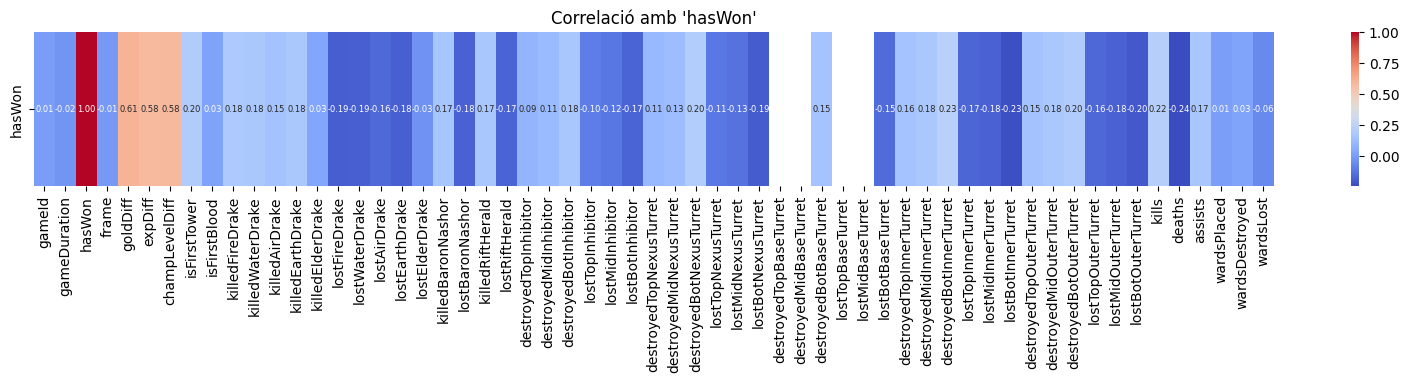

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar només columnes numèriques
numeric_df = df.select_dtypes(include=[np.number])

# Comprovar si 'hasWon' està present
if 'hasWon' in numeric_df.columns:
    # Correlació amb 'hasWon'
    winning_correlation = numeric_df.corr()['hasWon'].to_frame().T
    
    # Visualitzar el mapa de calor amb ajustaments
    plt.figure(figsize=(20, 2))  # Ajustar la mida de la figura
    sns.heatmap(winning_correlation, annot=True, cmap='coolwarm', cbar=True, fmt=".2f",
                annot_kws={"size": 6})  # Ajustar la mida del text de les anotacions
    plt.title("Correlació amb 'hasWon'")
    plt.show()
else:
    print("La columna 'hasWon' no es troba a les columnes numèriques.")



Amb aquest gràfic podem veure la correlació de les diferents columnes amb hasWon. Si són de colors vermells o ataronjats significa que tenen una correlació positiva forta i si són de colors blaus foscos significa una correlació negativa (a més gran el valor menys probabilitats de guanyar la partida). En canvi, els colors blancs (no es veu del tot bé a la llegenda), signifiquen que no tenen influència en la victòria i per tant segurament si són eliminades no tindria massa influència en el resultat.

Per exemple, veiem que hi ha bastanta relació haver guanyat amb la diferència d'or entre equips (gold diff) , la diferència d'experiència (expDiff)... Per altra banda veiem que, per exemple, les morts (deaths) tenen una relació contrària, a més en tinguin pitjor.

### 2.- Preprocessament de dades

Per començar amb el processament eliminarem la columna gameId del nostre dataset ja que aquesta ens dona un valor únic per cada partida que, per tant, observem que no ens donarà informació real de qui guanyarà la partida.

In [5]:
df = df.drop(columns=['gameId'])

A continuació, farem un entrenament amb Random Forest de les dades per veure quina correlació hi ha entre aquestes i la classe objectiu, si s'ha guanyat o perdut la partida. Un cop fet això, podrem considerar necessari eliminar alguna de les columnes.

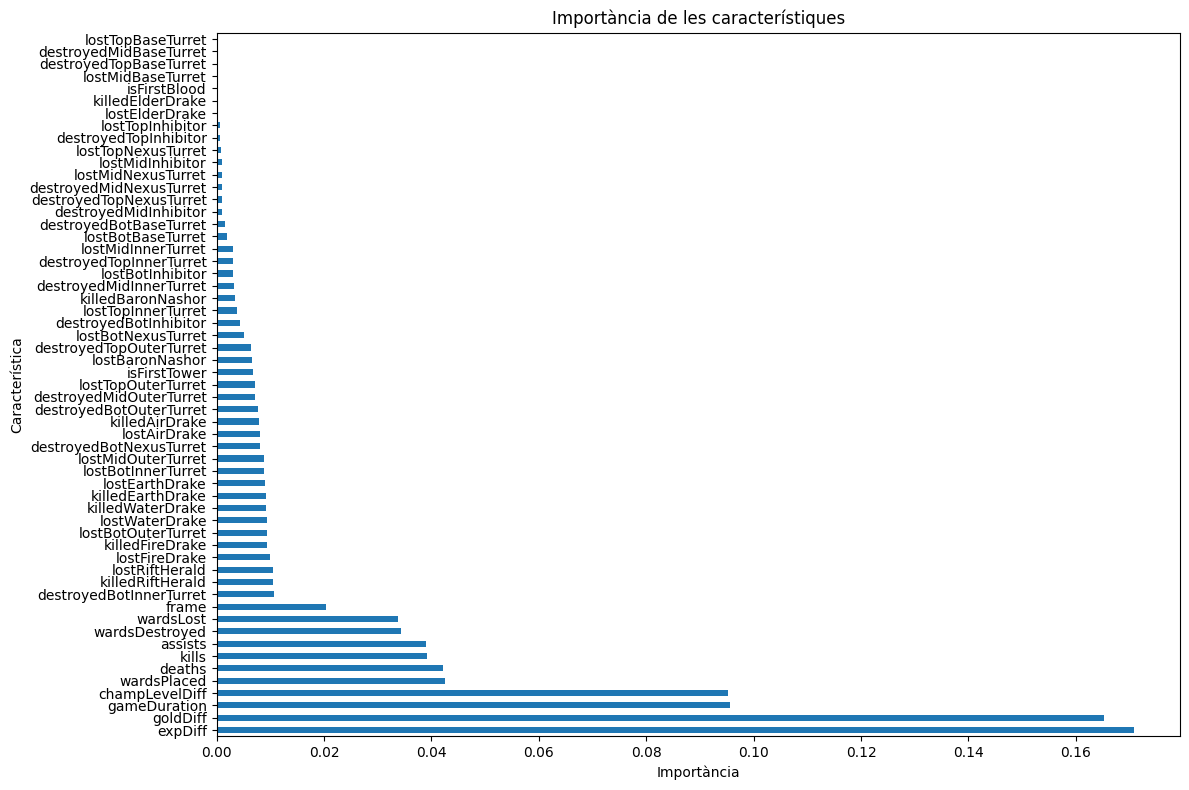

{'expDiff': 0.17085343961511004,
 'goldDiff': 0.16526783826351338,
 'gameDuration': 0.09558381136102298,
 'champLevelDiff': 0.09530274339267858,
 'wardsPlaced': 0.04254195809644555,
 'deaths': 0.0421796585428509,
 'kills': 0.03915783214961701,
 'assists': 0.039091916941789255,
 'wardsDestroyed': 0.03442694799272756,
 'wardsLost': 0.03371993170759938,
 'frame': 0.020321959501075664,
 'destroyedBotInnerTurret': 0.010762992237922687,
 'killedRiftHerald': 0.010538346824135628,
 'lostRiftHerald': 0.010429595593799634,
 'lostFireDrake': 0.009949632633598758,
 'killedFireDrake': 0.00944203091387328,
 'lostBotOuterTurret': 0.009412552091662077,
 'lostWaterDrake': 0.009333530470510302,
 'killedWaterDrake': 0.009284847920596199,
 'killedEarthDrake': 0.009190163260946405,
 'lostEarthDrake': 0.008994526375915078,
 'lostBotInnerTurret': 0.008860656585773143,
 'lostMidOuterTurret': 0.00877065653026222,
 'destroyedBotNexusTurret': 0.008086418290463153,
 'lostAirDrake': 0.00807525592747844,
 'killedAi

In [6]:
from sklearn.ensemble import RandomForestClassifier


# Creació del model Random Forest
model = RandomForestClassifier()

# Separació de dades en X (característiques) i y (objectiu)
X = df.drop(columns=['hasWon'])
y = df['hasWon']

# Entrenament del model
model.fit(X, y)

# Obtenir la importància de les característiques
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Ordenar les importàncies de més gran a més petit
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Visualització del gràfic de barres horitzontal
plt.figure(figsize=(12, 8))  # Ajustar la mida del gràfic
feature_importances_sorted.plot(kind='barh')
plt.title("Importància de les característiques")
plt.xlabel("Importància")
plt.ylabel("Característica")
plt.tight_layout()  # Evitar que els textos es tallin
plt.show()

# Convertir les importàncies a diccionari ordenat
feature_importances_dict = feature_importances_sorted.to_dict()
feature_importances_dict


Com podem veure de nou, hi ha alguns parametres que no tenen una gran importància a l'hora de predir si és guanyara o perdrà la partida, com per exemple, perdre les torres inicials o aconseguir la primera mort de la partida. Així doncs, "netejarem" el nostra dataset eliminant aquelles columnes que no ens resulten útils per la predicció.

In [7]:
selected_features = [feature for feature, importance in feature_importances_dict.items() if importance >= 0.01]

# Afegeix explícitament la columna 'hasWon'
if 'hasWon' in df.columns:
    selected_features.append('hasWon')

# Filtra el dataset amb les columnes seleccionades
df = df[selected_features]

df

,expDiff,goldDiff,gameDuration,champLevelDiff,wardsPlaced,deaths,kills,assists,wardsDestroyed,wardsLost,frame,destroyedBotInnerTurret,killedRiftHerald,lostRiftHerald,hasWon
0,-147,-448,1443000,-0.2,21,7,4,5,3,5,10,0,0,0,1
1,-925,-1306,1443000,-0.6,28,11,6,6,4,6,12,0,0,1,1
2,2578,2115,1443000,0.4,35,11,10,12,4,6,14,0,0,1,1
3,2134,1195,1443000,0.4,45,12,10,12,6,10,16,0,0,1,1
4,4382,2931,1443000,0.6,49,13,13,16,7,12,18,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242567,-13498,-8523,1774000,-1.6,80,41,33,50,18,17,30,0,0,2,0
242568,-1243,-271,1013000,-0.2,18,5,6,6,1,2,10,0,0,0,0
242569,-3493,-2013,1013000,-0.8,23,8,7,6,1,5,12,0,0,0,0
242570,-4543,-2388,1013000,-0.8,27,13,10,9,5,6,14,0,0,0,0


Com podem observar en el codi anterior, gràcies a prescindir de les columnes que no ens ajudaràn a predïr els resultats (només ens hem quedat amb les que influeixen un 1% o més) hem reduït en gran part el nostre dataset. De 59 features a 17. A continuació, investigarem com de balancejades estàn les nostres dades, per això, crearem una gràfica que ens mostrarà el percentatge que tenim de la classe objectiu 'has won' i també mostrarem el percentatge de cassos positius (és guanya la partida) i negatius, (és perd la partida)

Distribució de classes a la columna 'hasWon':
hasWon
0    50.187161
1    49.812839
Name: proportion, dtype: float64


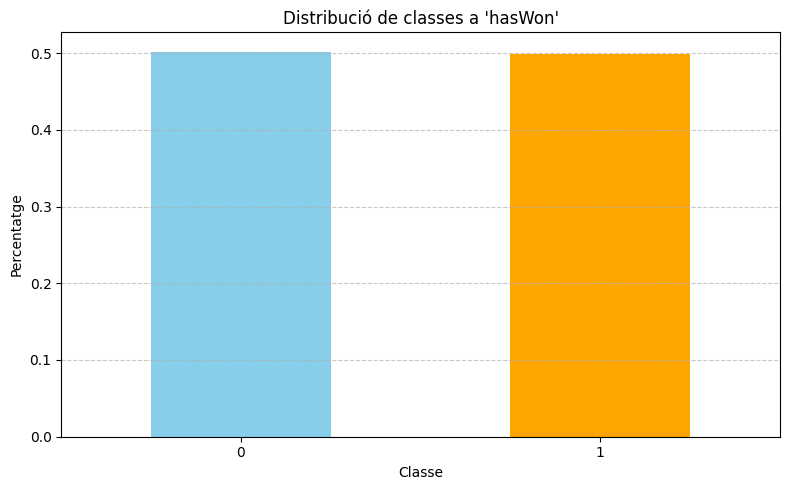

In [8]:
def analitza_balanceig(df, target_column='hasWon'):
    # Compta les ocurrències de cada categoria
    value_counts = df[target_column].value_counts(normalize=True)
    
    # Mostra el percentatge de cada classe
    print(f"Distribució de classes a la columna '{target_column}':")
    print(value_counts * 100)
    
    # Visualitza les dades amb un gràfic de barres
    plt.figure(figsize=(8, 5))
    value_counts.plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(f"Distribució de classes a '{target_column}'")
    plt.xlabel("Classe")
    plt.ylabel("Percentatge")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

analitza_balanceig(df)

Com podem observar, el nostre dataset està molt balancejat ja que tenim una proporció de quasi 50% de partides guanyades i 50% de partides perdudes.

A continuació, hem observat que les nostres dades no estàn normalitzades. Tot i que sí que observem que hi ha algunes columnes amb valors binaris (0 i 1) d'altres, com per exemple goldDiff tenen valors més grans que 1 i també negatius que podríen no beneficiar els nostres models. Així doncs, normalitzarem les dades del nostre dataset ja que així quan apliquem els models d'entrenament per a fer el classificador (molts d'aquests usen distàncies per fer els càlculs), obtindrem uns resultats més fiables. D'aquesta manera totes les dades tindràn valors entre 0 i 1.

In [9]:
from sklearn.preprocessing import MinMaxScaler
import copy
# Exclou la columna 'hasWon' per la normalització
features_to_normalize = df.drop(columns=['hasWon'])

# Inicialitza el MinMaxScaler
scaler = MinMaxScaler()
df_normalitzada = copy.deepcopy(df)
# Normalitza les dades
df_normalitzada[features_to_normalize.columns] = scaler.fit_transform(features_to_normalize)

# Mostra les primeres línies del dataset per veure els resultats
df_normalitzada.head()

,expDiff,goldDiff,gameDuration,champLevelDiff,wardsPlaced,deaths,kills,assists,wardsDestroyed,wardsLost,frame,destroyedBotInnerTurret,killedRiftHerald,lostRiftHerald,hasWon
0,0.426677,0.469451,0.310524,0.487179,0.017804,0.097222,0.057971,0.036496,0.026087,0.046729,0.000000,0.0,0.0,0.0,1
1,0.416412,0.450389,0.310524,0.435897,0.024728,0.152778,0.086957,0.043796,0.034783,0.056075,0.043478,0.0,0.0,0.5,1
2,0.462633,0.526394,0.310524,0.564103,0.031652,0.152778,0.144928,0.087591,0.034783,0.056075,0.086957,0.0,0.0,0.5,1
3,0.456774,0.505954,0.310524,0.564103,0.041543,0.166667,0.144928,0.087591,0.052174,0.093458,0.130435,0.0,0.0,0.5,1
4,0.486436,0.544523,0.310524,0.589744,0.045500,0.180556,0.188406,0.116788,0.060870,0.112150,0.173913,0.0,0.0,0.5,1


In [10]:
df.head()

,expDiff,goldDiff,gameDuration,champLevelDiff,wardsPlaced,deaths,kills,assists,wardsDestroyed,wardsLost,frame,destroyedBotInnerTurret,killedRiftHerald,lostRiftHerald,hasWon
0,-147,-448,1443000,-0.2,21,7,4,5,3,5,10,0,0,0,1
1,-925,-1306,1443000,-0.6,28,11,6,6,4,6,12,0,0,1,1
2,2578,2115,1443000,0.4,35,11,10,12,4,6,14,0,0,1,1
3,2134,1195,1443000,0.4,45,12,10,12,6,10,16,0,0,1,1
4,4382,2931,1443000,0.6,49,13,13,16,7,12,18,0,0,1,1


### 3.- Entrenament de models

Un cop analitzada i processada la nostra base de dades, procedirem a entrenar els diferents models. A part, comprovarem l'eficàcia de la normalització entrenant els models amb la BD normalitzada i sense normalitzar.

Provarem els següents models: random forest, gradient boosting, SVM i desition tree, ja que ens han semblat els més adecuats dins de tots pel nostre dataset. Per altra banda, de cada model mirarem quin és el millor hiperparàmetre per a que doni el millor rendiment, i per tant puguem fer una comparació justa entre models.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Hem provat d'entrenar els models i donaven un temps d'execució exageradament gran per a poder triar el millor model. Com aquests entrenaments no són el definitiu que ens permetrà fer prediccions, hem decidit que per a fer la tria d'hiperparàmetres i comparació del models ho farem amb un dataset reduït. A part, com el dataset és molt gran no hauria d'afectar massa al resultat. La mètrica que uilitzarem per el nostre estudi serà l'accuracy ja que com que les dades estan molt balancejades no serà necessari utilitzar d'altres mètriques com el f1-score. A més, pel que fa a la nostre base de dades, no volem penalitzar més cap error que altre, és igual de "dolent" supossar que una partida ha estat guanyada quan hauría d'haver estat perduda que viceversa.

A continucació creem el "sample" del nostre dataframe i separem les dades en test i train en el cas de les dades normalitzades i de les no normalitzades.

In [12]:
# Reduir el dataset al 10% per fer proves inicials
df_subset = df.sample(frac=0.1, random_state=42)  # 10% del dataset original
df_normalitzada_subset = df_normalitzada.sample(frac=0.1, random_state=42)  # 10% del dataset normalitzat

# Separar característiques i etiquetes (No normalitzades)
X_subset = df_subset.drop(columns=['hasWon'])
y_subset = df_subset['hasWon']

# Separar característiques i etiquetes (Normalitzades)
X_subset_norm = df_normalitzada_subset.drop(columns=['hasWon'])
y_subset_norm = df_normalitzada_subset['hasWon']

X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42
)
X_train_norm_subset, X_test_norm_subset, y_train_norm_subset, y_test_norm_subset = train_test_split(
    X_subset_norm, y_subset_norm, test_size=0.2, random_state=42
)

En primer lloc entrenarem i buscarem els millors hiperparàmetres del random forest:

In [13]:
# Paràmetres optimitzats
param_dist_rf = {
    'n_estimators': [50, 100, 150],  # Reduir el nombre d'arbres
    'max_depth': [5, 10, 15],        # Limitar la profunditat
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# RandomizedSearchCV per a dades no normalitzades
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=param_dist_rf,
                                      n_iter=5,   # Nombre reduït de proves
                                      cv=2,       # Validació creuada més ràpida
                                      scoring='accuracy',
                                      n_jobs=-1,
                                      random_state=42)
random_search_rf.fit(X_train_subset, y_train_subset)

# RandomizedSearchCV per a dades normalitzades
random_search_rf_norm = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                           param_distributions=param_dist_rf,
                                           n_iter=5,
                                           cv=2,
                                           scoring='accuracy',
                                           n_jobs=-1,
                                           random_state=42)
random_search_rf_norm.fit(X_train_norm_subset, y_train_norm_subset)

# Resultats
print(f"Random Forest (No Normalitzat) Best Score: {random_search_rf.best_score_}")
print(f"Random Forest (Normalitzat) Best Score: {random_search_rf_norm.best_score_}")
print(f"Best Parameters (No Normalitzat): {random_search_rf.best_params_}")
print(f"Best Parameters (Normalitzat): {random_search_rf_norm.best_params_}")


Random Forest (No Normalitzat) Best Score: 0.7881987047893027
Random Forest (Normalitzat) Best Score: 0.7876318219879122
Best Parameters (No Normalitzat): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best Parameters (Normalitzat): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


A continuació, mirarem la millor configuració d'hiperparàmetres del gradient boosting tant amb les dades normalitzades com sense normalitzar.

In [14]:
# Paràmetres optimitzats
param_dist_gb = {
    'n_estimators': [50, 100, 150],       # Menys arbres per començar
    'learning_rate': [0.01, 0.1, 0.2],   # Taxes d'aprenentatge típiques
    'max_depth': [3, 5, 7],              # Limitar profunditat
    'subsample': [0.8, 1.0]              # Mostreig per arbre
}

# RandomizedSearchCV per a dades no normalitzades
random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                                      param_distributions=param_dist_gb,
                                      n_iter=10,  # Redueix el nombre de proves
                                      cv=3,       # Reduir el nombre de folds
                                      scoring='accuracy',
                                      n_jobs=-1,
                                      random_state=42)
random_search_gb.fit(X_train_subset, y_train_subset)

# RandomizedSearchCV per a dades normalitzades
random_search_gb_norm = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                                           param_distributions=param_dist_gb,
                                           n_iter=10,
                                           cv=3,
                                           scoring='accuracy',
                                           n_jobs=-1,
                                           random_state=42)
random_search_gb_norm.fit(X_train_norm_subset, y_train_norm_subset)

# Resultats
print(f"Gradient Boosting (No Normalitzat) Best Score: {random_search_gb.best_score_}")
print(f"Gradient Boosting (Normalitzat) Best Score: {random_search_gb_norm.best_score_}")
print(f"Best Parameters (No Normalitzat): {random_search_gb.best_params_}")
print(f"Best Parameters (Normalitzat): {random_search_gb_norm.best_params_}")


Gradient Boosting (No Normalitzat) Best Score: 0.7890746662029483
Gradient Boosting (Normalitzat) Best Score: 0.7895900158945893
Best Parameters (No Normalitzat): {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01}
Best Parameters (Normalitzat): {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01}


Provarem també el Decission Tree

In [15]:
# Paràmetres optimitzats
param_dist_dt = {
    'max_depth': [None, 5, 10, 20],         # Profunditat màxima de l'arbre
    'min_samples_split': [2, 5, 10],       # Mínim de mostres per dividir un node
    'min_samples_leaf': [1, 2, 4],         # Mínim de mostres per fulla
    'criterion': ['gini', 'entropy']       # Funció de pèrdua
}

# RandomizedSearchCV per a dades no normalitzades
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                      param_distributions=param_dist_dt,
                                      n_iter=10,  # Limitar el nombre de proves
                                      cv=3,       # Reduir el nombre de folds
                                      scoring='accuracy',
                                      n_jobs=-1,
                                      random_state=42)
random_search_dt.fit(X_train_subset, y_train_subset)

# RandomizedSearchCV per a dades normalitzades
random_search_dt_norm = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                           param_distributions=param_dist_dt,
                                           n_iter=10,
                                           cv=3,
                                           scoring='accuracy',
                                           n_jobs=-1,
                                           random_state=42)
random_search_dt_norm.fit(X_train_norm_subset, y_train_norm_subset)

# Resultats
print(f"Decision Tree (No Normalitzat) Best Score: {random_search_dt.best_score_}")
print(f"Decision Tree (Normalitzat) Best Score: {random_search_dt_norm.best_score_}")
print(f"Best Parameters (No Normalitzat): {random_search_dt.best_params_}")
print(f"Best Parameters (Normalitzat): {random_search_dt_norm.best_params_}")


Decision Tree (No Normalitzat) Best Score: 0.7873224182987228
Decision Tree (Normalitzat) Best Score: 0.7873224182987228
Best Parameters (No Normalitzat): {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy'}
Best Parameters (Normalitzat): {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy'}


Per acabar entrenarem la SVM (Support Vector Machine). Aquesta, però, ja que és costosa per dades grans, només ho farem per les dades normalitzades ja que ja hem vist en les altres execuccions d'entrenaments que s'obté un valor de l'accuracy semblant però una mica més alt.

In [16]:
param_dist_svm = {
    'C': [0.1, 1, 10, 100],            # Regularització
    'kernel': ['linear', 'rbf'],       # Tipus de kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  # Gamma per kernels no lineals
}

# RandomizedSearchCV per a dades normalitzades
random_search_svm_norm = RandomizedSearchCV(SVC(random_state=42),
                                            param_distributions=param_dist_svm,
                                            n_iter=5,  # Nombre d'iteracions.
                                            cv=3,      # Numero de folds
                                            scoring='accuracy',
                                            n_jobs=-1,
                                            random_state=42)
random_search_svm_norm.fit(X_train_norm_subset, y_train_norm_subset)

# Resultats
print(f"SVM (Normalitzat) Best Score: {random_search_svm_norm.best_score_}")
print(f"Best Parameters (Normalitzat): {random_search_svm_norm.best_params_}")

SVM (Normalitzat) Best Score: 0.7903116122149756
Best Parameters (Normalitzat): {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}


A continuació mostrarem una gràfica que ens compara els valors de l'accuracy entre els diferents models que hem creat.

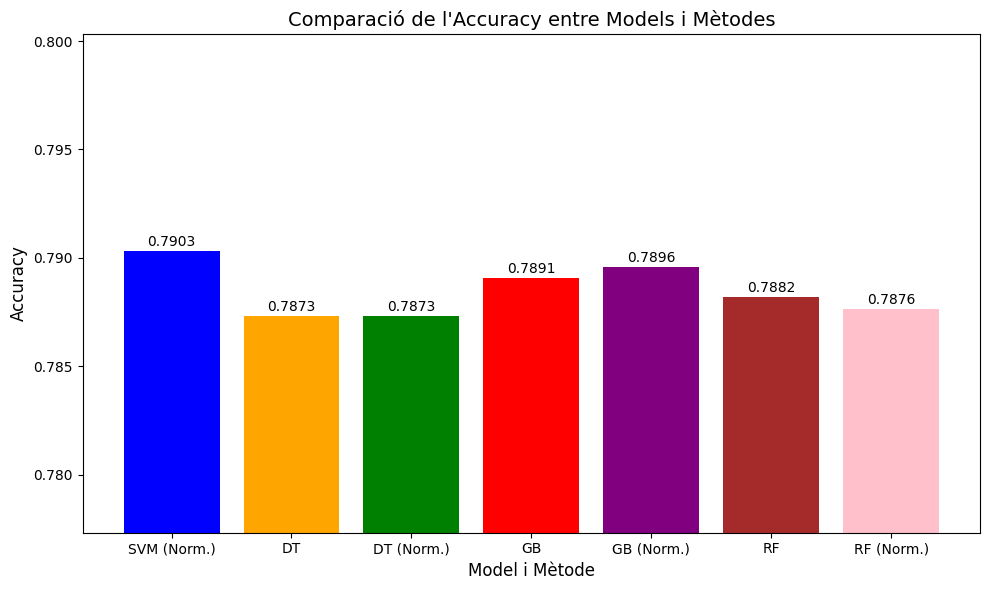

In [17]:
import matplotlib.pyplot as plt

# Valors d'accuracy per als diferents mètodes
models = [
    "SVM (Norm.)", 
    "DT", 
    "DT (Norm.)", 
    "GB", 
    "GB (Norm.)", 
    "RF", 
    "RF (Norm.)"
]
accuracies = [
    random_search_svm_norm.best_score_, 
    random_search_dt.best_score_, 
    random_search_dt_norm.best_score_, 
    random_search_gb.best_score_, 
    random_search_gb_norm.best_score_, 
    random_search_rf.best_score_, 
    random_search_rf_norm.best_score_
]

# Configuració per augmentar la precisió visual
min_acc = min(accuracies) - 0.01  # Límits inferiors amb un petit marge
max_acc = max(accuracies) + 0.01  # Límits superiors amb un petit marge

# Crear el gràfic de barres
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])

# Etiquetes i títol
plt.xlabel('Model i Mètode', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparació de l\'Accuracy entre Models i Mètodes', fontsize=14)
plt.ylim(min_acc, max_acc)  # Centrar-se en un rang més petit

# Afegir els valors al damunt de les barres
for i, acc in enumerate(accuracies):
    plt.text(i, acc + (max_acc - min_acc) * 0.01, f"{acc:.4f}", ha='center', fontsize=10)

# Mostrar el gràfic
plt.tight_layout()
plt.show()



Com podem veure en el gràfic anterior la millor mètrica es utilzar el SVM amb les dades normalitzades. Els hiperparàmetres que fem servir per aquest entrenament son un kernel linear, una gamma de 0.01 i la C de 100. A continuació, per intentar ajustar més si és possible el nostre mètode l'entrenarem amb totes les dades i amb els hiperaràmetres correctes ja calculats anteriorment.

In [23]:
from sklearn.model_selection import cross_val_score
# Separar característiques i etiquetes (No normalitzades)
X = df_normalitzada.drop(columns=['hasWon'])
y = df_normalitzada['hasWon']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# Definició del model SVM amb els hiperparàmetres especificats
svm_model = SVC(kernel='linear', gamma=0.01, C=100, random_state=42)

# Cross-validation amb 3 folds
cv_scores = cross_val_score(
    svm_model, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1
)

# Resultats
print(f"Accuracy per fold: {cv_scores}")
print(f"Mitjana de l'accuracy (cross-val): {cv_scores.mean():.4f}")
print(f"Desviació estàndard de l'accuracy: {cv_scores.std():.4f}")



Accuracy per fold: [0.78571355 0.78735004]
Mitjana de l'accuracy (cross-val): 0.7865
Desviació estàndard de l'accuracy: 0.0008


Com veiem, el resultat en aquest cas es pitjor que quan teniem una mostra més petita de les dades i molt mes costos a nivell computacional. Així doncs, repetirem amb un valor de C més petit per evitar l'Overfitting. I poder comparar amb el cas anterior.

In [24]:
from sklearn.model_selection import cross_val_score
# Separar característiques i etiquetes (No normalitzades)
X = df_normalitzada.drop(columns=['hasWon'])
y = df_normalitzada['hasWon']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# Definició del model SVM amb els hiperparàmetres especificats
svm_model = SVC(kernel='linear', gamma=0.01, C=0.1, random_state=42)

# Cross-validation amb 3 folds
cv_scores = cross_val_score(
    svm_model, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1
)

# Resultats
print(f"Accuracy per fold: {cv_scores}")
print(f"Mitjana de l'accuracy (cross-val): {cv_scores.mean():.4f}")
print(f"Desviació estàndard de l'accuracy: {cv_scores.std():.4f}")



Accuracy per fold: [0.78566202 0.7872779 ]
Mitjana de l'accuracy (cross-val): 0.7865
Desviació estàndard de l'accuracy: 0.0008


Com podem observar, usar un dataset amb més dades en aquest cas no ens serveix per millorar l'accuracy del nostre model tot i variar els hiperparàmetres. Per tant, considerarem que el millor model es el SVM amb el dataset samplejat (i així reduïnt l'Overfitting). A continuació mostrarem la matriu de confusió quan entrenem el millor model i amb els hyperperàmetres amb millors resultats que hem obtingut per tenir encara més dades sobre com classifica aquest.

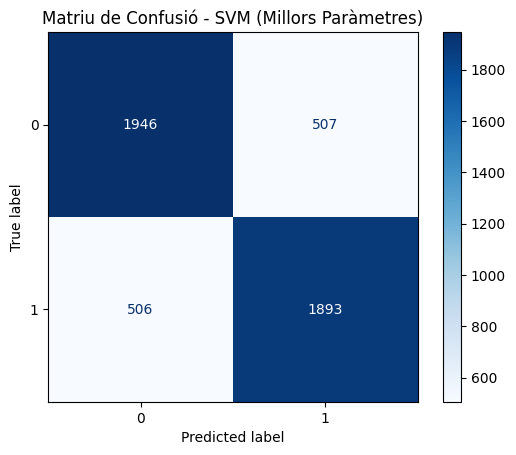

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Millors paràmetres del RandomizedSearchCV
best_params = random_search_svm_norm.best_params_

# Crear el model SVM amb els millors paràmetres
best_svm_model = SVC(**best_params, random_state=42)
best_svm_model.fit(X_train_norm_subset, y_train_norm_subset)

# Prediccions amb el conjunt de test normalitzat
y_pred = best_svm_model.predict(X_test_norm_subset)

# Generar la matriu de confusió
cm = confusion_matrix(y_test_norm_subset, y_pred)

# Mostrar la matriu de confusió amb una visualització
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_model.classes_)
disp.plot(cmap='Blues', values_format='d')

# Mostrar el gràfic
plt.title('Matriu de Confusió - SVM (Millors Paràmetres)')
plt.show()


Com podem observar la matriu de confusió ens mostra que el nostre classificador funciona correctament ja que tenim uns valors elevats en True Positive i True Negaitve. A part, observem que no hi ha desbalanceig a l'hora de determinar si s'ha guanyat o perdut la partida. Això ho considerem positiu ja que no busquem millorar una d'aquestes mètriques en especific.

### Conclusions

- En el preproccès de les dades hem hagut de veure quines característiques no eren necessàries per reduir la complexitat i el soroll al model i també hem fet la normalització de les dades per anivellar l'escala del nostre dataset. El preprocessament ha estat importatn per millorar el rendiment del model.

- Després de realitzar diferents proves amb diversos models i hiperparàmetres, s'ha conclòs que el millor model per al dataset de League of Legends és un **SVM** amb els següents paràmetres: Kernel: `rbf`, Gamma: `0.01` i C: `100`. També hem utilitzat les dades normalitzades.

- Hem observat que l'Overfitting era un problema al treballar amb un dataset tant gran i samplejar mostres ha estat una millora per reduïr tant l'Overfitting com el cost computacional d'entrenar el model.

- Finalment, pel que fa a la Matriu de Confusió veiem que mostra que el model classifica correctament la gran majoria dels casos en el conjunt de test, amb un **accuracy proper al 80%**. Aquest resultat és molt satisfactori, especialment tenint en compte que les dades estan balancejades, per tant, l'accuracy és la mètrica adequada per mesurar el rendiment en aquest cas. El model pot servir com una eina fiable per analitzar i predeïr esdeveniments i el desenllaç de partides del League of Legends, amb una precisió força alta.
